In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.basemap import Basemap # need to install basemap and geos 
from allskymap import AllSkyMap

%matplotlib inline

### Sky Coverage

In [2]:
latTimau = -9.6 # lintang Timau in degree
elevMin = 15.0 # minimum elevation of telescopoe

In [3]:
decMaxN = 90.0 - (elevMin - latTimau)
decMaxS = -90.0 + (elevMin + latTimau)
print decMaxN, decMaxS

65.4 -84.6


$$\frac{\int_{0}^{2\pi} \int_{a}^{b} \sin{\theta} d \theta d \phi }{4 \pi}$$

In [4]:
coverage = 0.5*(-math.cos(math.radians(174.6))+math.cos(math.radians(24.6)))
print "Sky coverage: ", coverage*100, '%'

Sky coverage:  95.2399036825 %


### Equatorial coordinate

In [5]:
xedge = np.linspace(-180, 180, 100)
yedge = np.linspace(decMaxS, decMaxN, 100)
X, Y = np.meshgrid(xedge, yedge)

In [6]:
colo = np.zeros((100, 100)) + 0.2 # sakwerno
from matplotlib.colors import ListedColormap
WhGrYlBu = ListedColormap(['#b7f6ff', '#70edff', '#29e4ff', '#00e1fb', '#0fffc6', '#3bffa4', '#68ff82', '#94ff60', '#c0ff3e', '#edff1c', '#fff400', '#ffc700', '#ff9b00', '#ff6e00', '#ff4200', '#ff1500', '#e80000', '#bb0000', '#8f0000'])
#.from_list('WhGrYlBu', ['white', 'cyan', 'lightblue', 'lightgreen', 'green', 'yellow', 'orange', 'red', 'red'])

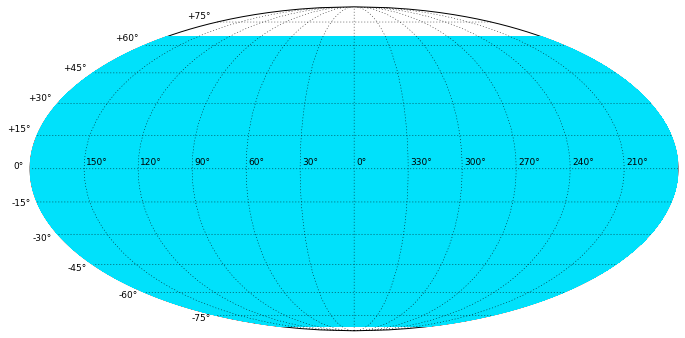

In [7]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=0.5, dashes=[1,2],
    labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-150,151,30), linewidth=0.5, dashes=[1,2])

m.pcolormesh(X, Y, colo, vmin=0., vmax=1., cmap=WhGrYlBu, latlon=True)#, alpha=0.5)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=9, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right


plt.show()

### Overlay with allsky catalogue
- Yale Bright Star Catalog (V < 8)

In [8]:
filename = 'bsc5.dat'
ra = []
dec = []
l = []
b = []
mag = []
with open(filename, 'r') as ifile:
    for dataline in ifile:
        if dataline[102:107].strip():
            ra.append(dataline[75:77] + 'h' + dataline[77:79] + 'm' +  dataline[79:83] + 's') #hms
            dec.append(dataline[83:86] + 'd' + dataline[86:88] + 'm' + dataline[88:90] + 's') #dms
            l.append(dataline[90:96]) # degree
            b.append(dataline[96:102]) # degree
            mag.append(float(dataline[102:107]))     

ra = np.array(ra)
dec = np.array(dec)
l = np.array(l)
b = np.array(b)
mag = np.array(mag)

In [9]:
mag[mag<0.0]

array([-0.72, -1.46, -0.04, -0.01])

In [ ]:
mag.max()

7.96

In [ ]:
eq = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg), frame='fk5')

In [ ]:
print len(eq.dec.value)
mask1 = eq.dec.value > decMaxS
deco = eq.dec.value[mask1]
print len(deco)
mask2 = deco < decMaxN
decoo = deco[mask2]
print len(decoo)

In [ ]:
rao = eq.ra.value[mask1]
raoo = rao[mask2]

In [ ]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=0.5, dashes=[1,2],
    labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-150,151,30), linewidth=0.5, dashes=[1,2])

x, y = m(raoo, decoo)
cr_pts = m.scatter(x, y, s=(mag.max()+2 - mag), c='r', marker='o', linewidths=0.5, edgecolors='none', alpha=0.5)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=9, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()

#### Galactic coordinate

In [ ]:
gal = SkyCoord(l=l, b=b, unit=(u.deg, u.deg), frame='galactic')

In [ ]:
lo = gal.l.value[mask1]
loo = lo[mask2]

bo = gal.b.value[mask1]
boo = bo[mask2]

In [ ]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=0.5, dashes=[1,2],
    labels=[1,0,0,0], fontsize=9)
m.drawmeridians(np.arange(-150,151,30), linewidth=0.5, dashes=[1,2])

x, y = m(loo, boo)
cr_pts = m.scatter(x, y, s=(mag.max()+2 - mag), c='r', marker='o', linewidths=0.5, edgecolors='none', alpha=0.5)


# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=9, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()